In [ ]:
# https://www.youtube.com/watch?v=jztwpsIzEGc&ab_channel=NicholasRenotte

# TODO

## method 1
- Read image, crop to the size
- assign to tensorflow

## Method 2 using tf, tf.io.read_fiel(path)
- read file
- label
- decode, convert img type, resize
- 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
print( f"TensorFlow {tf.__version__}" )
import sys
print( f"Python {sys.version}\n" )


TensorFlow 2.6.0
Python 3.9.17 (main, Jul  5 2023, 21:22:06) [MSC v.1916 64 bit (AMD64)]



In [4]:
lst_gpu = tf.config.list_physical_devices('GPU')
lst_gpu

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.test.is_built_with_cuda()

True

In [ ]:
import cv2
import os

def read_image_data(directory):
    image_data = []
    for filename in os.listdir(directory):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(directory, filename))
            if img is not None:
                image_data.append(img)
    return image_data




In [29]:
data_parent_path = './cruiser/'
lst_dir_img = os.listdir(data_parent_path)
print('all files :', len(lst_dir_img))
lst_dir_img = [x for x in lst_dir_img if '.jpg' in x or '.png' in x]
print('jpg/ png files :', len(lst_dir_img))
lst_dir_img[:10]


all files : 82
jpg/ png files : 59


['$_1.jpg',
 '10-best-cruiser-motorcycles.jpg',
 '1024px-Yamaha_Vmax_motorbike_cropped.jpg',
 '10retromotorcyclesv3-1600716899.jpg',
 '1240_2022120716585842.jpg',
 '16031x1280x0_FFFFFF_H.jpg',
 '1941-harley-davidson-knucklehead-ssu-698x500.jpg',
 '1951-ariel-square-four.jpg',
 '1956-elvis-presley-harley-davidson.jpg',
 '2019_Honda_Rebel_500_hJvs0Ww.jpg']

In [39]:
data_parent_path

'./cruiser/'

In [30]:
rd = cv2.imread(data_parent_path + lst_dir_img[0])
print(type(rd))
print(rd.shape)

<class 'numpy.ndarray'>
(263, 400, 3)


In [51]:
x_train = []
for fname in lst_dir_img:
    try:
        print(fname)
        rd = cv2.imread(data_parent_path + fname)
        rd = cv2.resize(rd, (200,200))
        x_train.append(rd)
    except:
        pass

$_1.jpg
10-best-cruiser-motorcycles.jpg
1024px-Yamaha_Vmax_motorbike_cropped.jpg
10retromotorcyclesv3-1600716899.jpg
1240_2022120716585842.jpg
16031x1280x0_FFFFFF_H.jpg
1941-harley-davidson-knucklehead-ssu-698x500.jpg
1951-ariel-square-four.jpg
1956-elvis-presley-harley-davidson.jpg
2019_Honda_Rebel_500_hJvs0Ww.jpg
2020-comprehensive-vintage-motorcycle-price-guide-1.jpg
2022-Gold-Star-FoS-Visordown-run (6)_0.jpg
4f9d5900c85d4b407619595578959d72dc81f8b3 (1).jpg
4f9d5900c85d4b407619595578959d72dc81f8b3.jpg
4WLYZHSABJBNJEACNPJVRRPPKI.jpg
5-future-classic-motorcycles_012.jpg.crdownload
54046.jpg
7630321-0-44598161.jpg
76dff08f8321285b28c5f52031d5caab.jpg
9d7a4466bce9eedb24625645db45182c.jpg
Aermacchi-1966-Sprint-2310-6-600x400.jpg
affordablemotorcycles_bsarocket_art.jpg
affordablemotorcycles_hero.jpg
back-to-the-future-sterling-modern-retro-classic-motorcycles.jpg
Best-Cruisers-under-15000-1176x588-1.jpg.crdownload
bmw-classic-motorcycle.jpg
bmw-r27-restomod-bolt.jpg
BSA-Bantam-D10A-Sport-

In [52]:
x_train2 = np.array(x_train)

In [186]:

def get_label(file_path):
  global lst_dir_label
  CLASS_NAMES = lst_dir_label
  parts = tf.strings.split(file_path, '/')
  return parts[-2] == CLASS_NAMES
  # return parts[-2]
  
# def get_label(path):
#     dct_class = {
#         'cruiser': 0,
#         'sport': 1,
#         'dirt': 2,
#         'adventure': 3
#     }
#     lst_classname = [False, False, False, False]

#     _class = path.split('/')[-2]
#     lst_classname[dct_class[_class]] = True
    
#     return lst_classname


def decode_img(img):
  IMG_WIDTH, IMG_HEIGHT = 250, 250
  img = tf.image.decode_jpeg(img, channels=3) #0: using image layers #3: color images
  img = tf.image.convert_image_dtype(img, tf.float32) 
   #convert unit8 tensor to floats in the [0,1]range
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT]) 
#resize the image into 224*224 

def process_path(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [163]:
parent_dir = './raw_data/'
lst_dir_label = os.listdir(parent_dir)
lst_dir_label

['adventure', 'cruiser', 'dirt', 'sport']

In [170]:
list_ds = tf.data.Dataset.list_files('./raw_data/*/*')#.shuffle
print(list_ds.take(1))
print('total size :', len(list_ds))
print('sample of data :', [x for x in list_ds.take(1)])


<TakeDataset shapes: (), types: tf.string>
total size : 927
sample of data : [<tf.Tensor: shape=(), dtype=string, numpy=b'.\\raw_data\\dirt\\86269448-green-cross-motorcycle-dirt-bike-on-a-photo-shoot-training-motocross-bike.jpg'>]


In [196]:
AUTOTUNE=tf.data.experimental.AUTOTUNE
labeled_ds  = list_ds.map(process_path, num_parallel_calls= AUTOTUNE)

In [197]:
labeled_ds.take(400)

<TakeDataset shapes: ((250, 250, 3), (4,)), types: (tf.float32, tf.bool)>

In [199]:
# for image, label in labeled_ds.take(1):
#     # print('imange shape :', image.numpy())
#     print()
#     # print('Label :', label.numpy())

In [128]:
# CLASS_NAMES = np.array([item for item in lst_dir_img])
# CLASS_NAMES

## Read using image_dataset_from_directory

In [25]:
directory = './raw_data2/'
tf_raw_data = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode= 'int',#'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=2,
    image_size=(200, 200),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 51 files belonging to 4 classes.


## Augmentation

In [26]:
dataaug = tf.keras.models.Sequential( [
                                          tf.keras.Input(shape=(200,200,1)),
                                          tf.keras.layers.RandomFlip(mode='horizontal_and_vertical', name='rand_flip'),
                                          tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode='constant', name='rand_trans'),
                                          tf.keras.layers.RandomRotation(factor=0.2, fill_mode='constant', name='rand_rot')
                                      ],
                                     name='dataaug' )

dataaug.summary()

Model: "dataaug"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rand_flip (RandomFlip)       (None, 200, 200, 1)       0         
_________________________________________________________________
rand_trans (RandomTranslatio (None, 200, 200, 1)       0         
_________________________________________________________________
rand_rot (RandomRotation)    (None, 200, 200, 1)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [66]:
x_train[0].shape

(200, 200, 3)

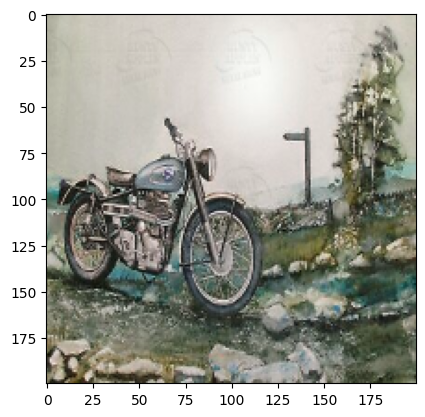

In [63]:
plt.imshow(x_train[0])

In [70]:
x_train2 = np.array(x_train).astype(np.float32)

In [72]:
# x_train = batch[0]
x_train = x_train2
# Test using the augmentation model
plt.figure(figsize=(15,5))
for i in range(5):
  print(i)
  try:
    x_aug = dataaug( tf.convert_to_tensor( x_train[i].reshape(200,200,1) ) )
    # x_aug = dataaug( tf.convert_to_tensor( x_train[i] ) )
    plt.subplot(150 + 1 + i)#.set_title( y_train[i] )
    plt.imshow( x_aug.numpy().squeeze(), cmap=plt.get_cmap('gray'))
  except Exception as e:
    print(e)
    pass
plt.show()

0
cannot reshape array of size 120000 into shape (200,200,1)
1
cannot reshape array of size 120000 into shape (200,200,1)
2
cannot reshape array of size 120000 into shape (200,200,1)
3
cannot reshape array of size 120000 into shape (200,200,1)
4
cannot reshape array of size 120000 into shape (200,200,1)


<Figure size 1500x500 with 0 Axes>

In [256]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator with augmentation
data_gen = ImageDataGenerator(
                                featurewise_center=False,
                                featurewise_std_normalization=False,
                                rotation_range=20,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2,       # set validation split
                                preprocessing_function=None # run this after the image is resized and augmented
                
)

In [12]:
data_iter = tf_raw_data.as_numpy_iterator()
type(data_iter)


tensorflow.python.data.ops.dataset_ops._NumpyIterator

In [17]:
batch = data_iter.next()
# batch[0][0][0][0]
print('type :', type(batch))

type : <class 'tuple'>


In [73]:
batch[0]

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [20]:
len(batch[0])

2

In [274]:
scaled = batch[0] / 255
scaled.min()

0.0

In [232]:
tf_raw_data.class_names[0]

'adventure'

In [258]:
# augmented_data = tf_raw_data.map(lambda x, y: (data_gen.apply_transform(x, data_gen.get_random_transform(x.shape)), y))

In [211]:
type(tf_raw_data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [241]:
num_classes = 4

In [259]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),  # Flatten the data before the Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Set the number of classes in your dataset
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(tf_raw_data, epochs=10)  # Adjust the number of epochs as needed


Epoch 1/10


ValueError: in user code:

    c:\Users\kimte\.conda\envs\tf-gpu2\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    c:\Users\kimte\.conda\envs\tf-gpu2\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\Users\kimte\.conda\envs\tf-gpu2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\Users\kimte\.conda\envs\tf-gpu2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\Users\kimte\.conda\envs\tf-gpu2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\Users\kimte\.conda\envs\tf-gpu2\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    c:\Users\kimte\.conda\envs\tf-gpu2\lib\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    c:\Users\kimte\.conda\envs\tf-gpu2\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    c:\Users\kimte\.conda\envs\tf-gpu2\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    c:\Users\kimte\.conda\envs\tf-gpu2\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\Users\kimte\.conda\envs\tf-gpu2\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\Users\kimte\.conda\envs\tf-gpu2\lib\site-packages\keras\losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    c:\Users\kimte\.conda\envs\tf-gpu2\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\Users\kimte\.conda\envs\tf-gpu2\lib\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    c:\Users\kimte\.conda\envs\tf-gpu2\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 4) are incompatible


In [212]:
tf_raw_data.map(decode_img)

TypeError: in user code:


    TypeError: tf__decode_img() takes 1 positional argument but 2 were given


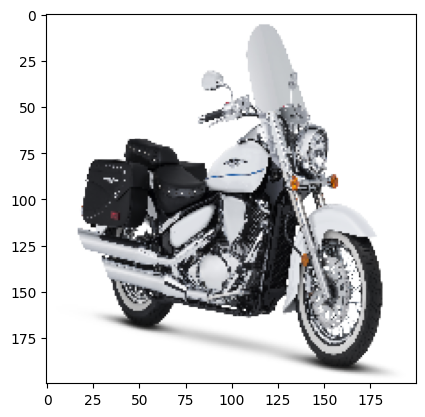

In [129]:
a_im_path = data_parent_path + lst_dir_img[57]
img = tf.io.read_file(a_im_path)
img = tf.image.decode_jpeg(img, channels=0)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, [200,200])
plt.imshow(img)

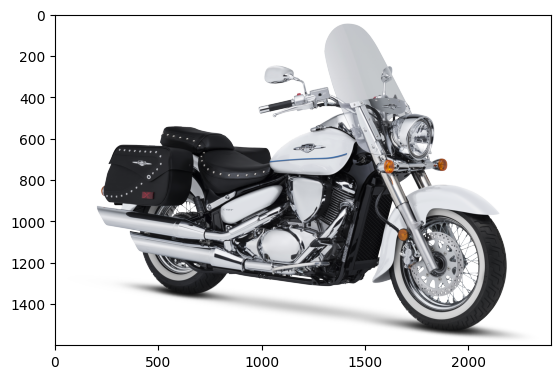

In [130]:
a_im_path = data_parent_path + lst_dir_img[57]
img = tf.io.read_file(a_im_path)
img = tf.image.decode_jpeg(img, channels=0)
img = tf.image.convert_image_dtype(img, tf.float32)
plt.imshow(img)

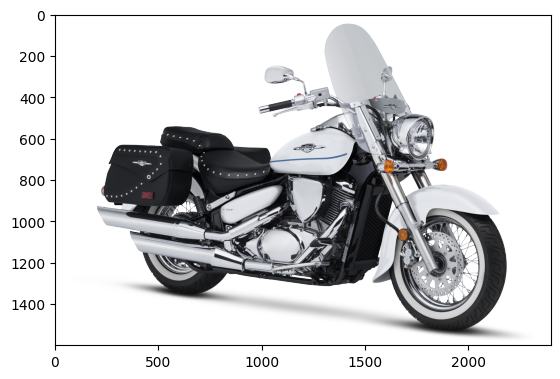

In [131]:
a_im_path = data_parent_path + lst_dir_img[57]
img = tf.io.read_file(a_im_path)
img = tf.image.decode_jpeg(img, channels=0)
plt.imshow(img)

In [132]:
lst_dir_img[57]

'VL800TM1_YUH_D_NoBackrest_WEB.png'

In [133]:
cv2.imread(os.path.join(data_parent_path + lst_dir_img[30])).shape

(594, 960, 3)

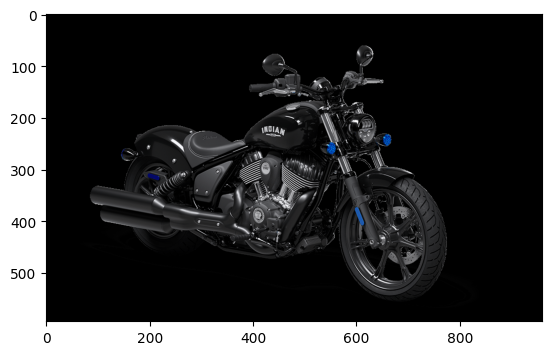

In [134]:
plt.imshow(cv2.imread(os.path.join(data_parent_path + lst_dir_img[30])))

In [135]:
c = 0
for i in lst_dir_img:
    if '.png' in i:
        print(i)
        print(c)
    c+=1

chief-my23-84bb-black-metallic.png
30
VL800TM1_YUH_D_NoBackrest_WEB.png
57


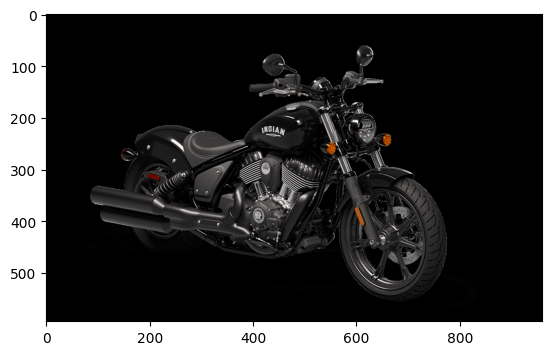

In [136]:
plt.imshow(decoded)

In [137]:
# for i in [30,57,1]:

a_im_path = data_parent_path + lst_dir_img[30]
print(a_im_path)
img = tf.io.read_file(a_im_path)

# decoded = tf.image.decode_jpeg(img, channels=3)
# print(lst_dir_img[i], 'show using jpg')
# plt.imshow(decoded)
decoded = tf.image.decode_png(img, channels=3)
print(lst_dir_img[i], 'show using png')
plt.imshow(decoded)
    
    # decoded.numpy()

./cruiser/chief-my23-84bb-black-metallic.png


TypeError: list indices must be integers or slices, not str

In [ ]:
data_dir = './raw_data/'
list_ds = tf.data.Dataset.list_files(data_dir, shuffle=False)

# list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)
# list_ds.shuffle
list_ds

<TensorSliceDataset shapes: (), types: tf.string>

In [ ]:
for i in list_ds.take(1):
    print(i.numpy())

b'.\\raw_data\\'


In [ ]:
data_dir = './raw_data/'
batch_size = 1
train_ds = tf.keras.utils.image_dataset_from_directory(
  rd,
  validation_split=0.2,
  subset="training",
  seed=123,
#   image_size=(img_height, img_width),
  batch_size=batch_size)

ValueError: listdir: embedded null character in path